<a href="https://colab.research.google.com/github/jamal-faisal/EDA_Hotel/blob/main/EDA_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Hotel Booking Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1**    - Faisal Jamal

#**Problem Statement**

#**Let's Begin**

Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###1. Dataset Loading

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
path = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/EDA/Copy of Hotel Bookings.csv"
df = pd.read_csv(path)

### Dataset First View

In [4]:
df.head()         # Dataset First View

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [5]:
df.shape          # Dataset Rows & Columns

(119390, 32)

### Dataset Information

In [6]:
df.info()         # Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df_hotel = df.copy()          #Creatind Copy of original dataframe

#### Duplicate Values

In [8]:
print(len(df_hotel[df_hotel.duplicated()]))        # Dataset Duplicate Value Count

31994


As we can see their were 31994 duplicate values in the dataset before dropping them.

#### Missing Values/Null Values

In [9]:
print(df_hotel.isnull().sum())        # Missing Values/Null Values Count

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


The dataset contains null values in the columns childern(4), country(452), agent(12193) and company(82137)

### What did you know about your dataset?

The given dataset is about the hotel booking and contains total 32 columns describing various information about the total 119390 booking.
The dataset also have some null as well as duplicate values that are to be checked before starting the analysis and visualization.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# Dataset Describe
df_hotel.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396,75203.000000,5259.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53428,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,...,86251,NaN,NaN,NaN,71986,NaN,NaN,NaN,63371,211
mean,NaN,0.274898,79.891368,2016.210296,NaN,26.838334,15.815541,1.005263,2.625395,1.875795,...,NaN,94.138306,183.081384,0.749565,NaN,106.337246,0.084226,0.698567,NaN,NaN
std,NaN,0.446466,86.052325,0.686102,NaN,13.674572,8.835146,1.031921,2.053584,0.626500,...,NaN,113.188172,130.557608,10.015731,NaN,55.013953,0.281533,0.831946,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,47.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,169.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,...,NaN,240.000000,263.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


### Variables Description

Their are total 32 variables namely 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'and 'reservation_status_date'.
       With 31994 duplicate values in the dataset and null values in children, agent, country and company.

### Check Unique Values for each variable.

In [12]:
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

In [13]:
# Check Unique Values in relevent variable.
lst_of_col = ['hotel', 'arrival_date_year','meal','market_segment', 'distribution_channel','reserved_room_type',
              'assigned_room_type', 'deposit_type', 'customer_type','reservation_status']
for i in lst_of_col:
  print("No. of unique values in ",i,"are",df_hotel[i].unique(),".")

No. of unique values in  hotel are ['Resort Hotel' 'City Hotel'] .
No. of unique values in  arrival_date_year are [2015 2016 2017] .
No. of unique values in  meal are ['BB' 'FB' 'HB' 'SC' 'Undefined'] .
No. of unique values in  market_segment are ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation'] .
No. of unique values in  distribution_channel are ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS'] .
No. of unique values in  reserved_room_type are ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B'] .
No. of unique values in  assigned_room_type are ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K'] .
No. of unique values in  deposit_type are ['No Deposit' 'Refundable' 'Non Refund'] .
No. of unique values in  customer_type are ['Transient' 'Contract' 'Transient-Party' 'Group'] .
No. of unique values in  reservation_status are ['Check-Out' 'Canceled' 'No-Show'] .


## ***3. Cleaning data***

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \

Remove duplicate rows \
Handling missing values. \
Convert columns to appropriate datatypes. \
Adding important columns

### Removing Duplicate Rows

In [55]:
df_hotel.drop_duplicates(inplace = True)      #Deletind duplicate values

###Handling missing values

In [14]:
df_hotel.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [15]:
# Removing rows with coloumn childern null as only rows
df_hotel.dropna(axis = 0, subset = ['children'], inplace = True)

# dropping the colum Company as less than 10% of it has not null value and little to no significance in insights
df_hotel.drop('company', axis = 1, inplace = True)

# Filling the null values of country as others
df_hotel['country'].fillna('others', inplace = True)

# Filling null values of agents as 0 as agent in integer
df_hotel['agent'].fillna(0, inplace = True)

In [16]:
# Checking that their is no columns with null value
df_hotel.isnull().sum().sort_values(ascending = False)

hotel                             0
is_repeated_guest                 0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
distribution_channel              0
is_canceled                       0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month          

In [17]:
# Dropping the only Undefined Value of distribution channel as this will cause no effect in data
df_hotel.drop(df_hotel[df_hotel['distribution_channel'] == 'Undefined'].index , inplace = True)

In [18]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87391 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87391 non-null  object 
 1   is_canceled                     87391 non-null  int64  
 2   lead_time                       87391 non-null  int64  
 3   arrival_date_year               87391 non-null  int64  
 4   arrival_date_month              87391 non-null  object 
 5   arrival_date_week_number        87391 non-null  int64  
 6   arrival_date_day_of_month       87391 non-null  int64  
 7   stays_in_weekend_nights         87391 non-null  int64  
 8   stays_in_week_nights            87391 non-null  int64  
 9   adults                          87391 non-null  int64  
 10  children                        87391 non-null  float64
 11  babies                          87391 non-null  int64  
 12  meal                           

## 3. **Adding important columns**

In [19]:
# Convert integer of arrival year and arrival date columns to string type
df_hotel['arrival_date_year'] = df_hotel['arrival_date_year'].astype(str)
df_hotel['arrival_date_day_of_month'] = df_hotel['arrival_date_day_of_month'].astype(str)

# Concatenate columns into a new single column
df_hotel['arrival_date'] = df_hotel['arrival_date_year'] + '-' + df_hotel['arrival_date_month'] + '-' + df_hotel['arrival_date_day_of_month']

#Converting the arival date dtype string to datetime format
df_hotel['arrival_date'] = pd.to_datetime(df_hotel['arrival_date'])

In [20]:
# Adding a new column total number of guests
df_hotel['total_number_of_guests'] = (df_hotel['adults'] +df_hotel['babies']+ df_hotel['children']).astype(int)

# Adding a new column total number of night stay
df_hotel['total_night_stay'] = (df_hotel['stays_in_week_nights']+df_hotel['stays_in_weekend_nights']).astype(int)

# Getting day of arrival from arrival date
df_hotel['arrival_day'] = df_hotel['arrival_date'].dt.day_name()

df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'total_number_of_guests', 'total_night_stay', 'arrival_day'],
      dtype='object')

## 3. ***Data Visualization***

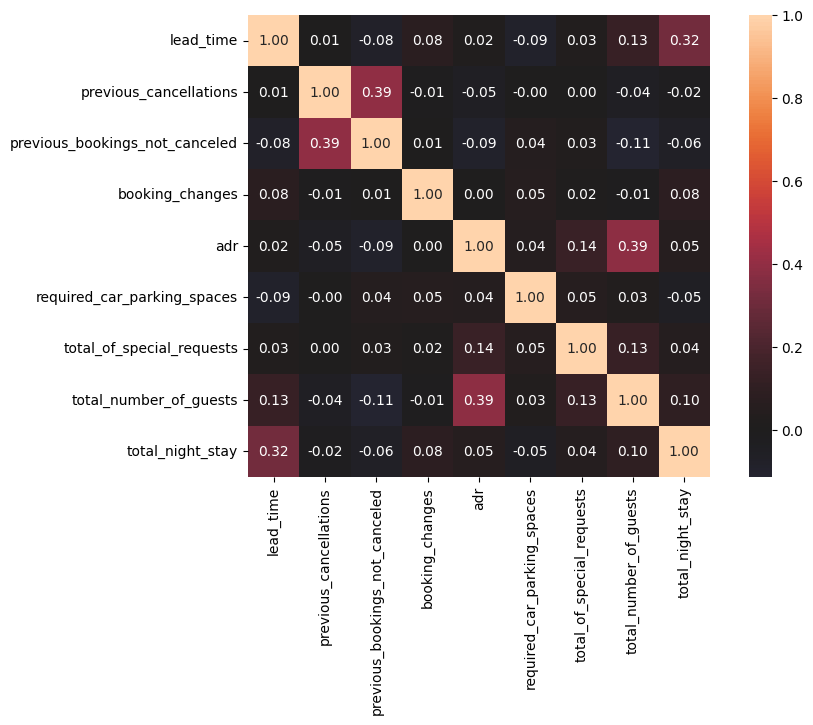

In [21]:
df_heatmap = df_hotel[['lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_number_of_guests', 'total_night_stay']]

corr = df_heatmap.corr()

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=1, center = 0, square=True);

[Text(0, 3, '99.02'), Text(0, 3, '110.99')]

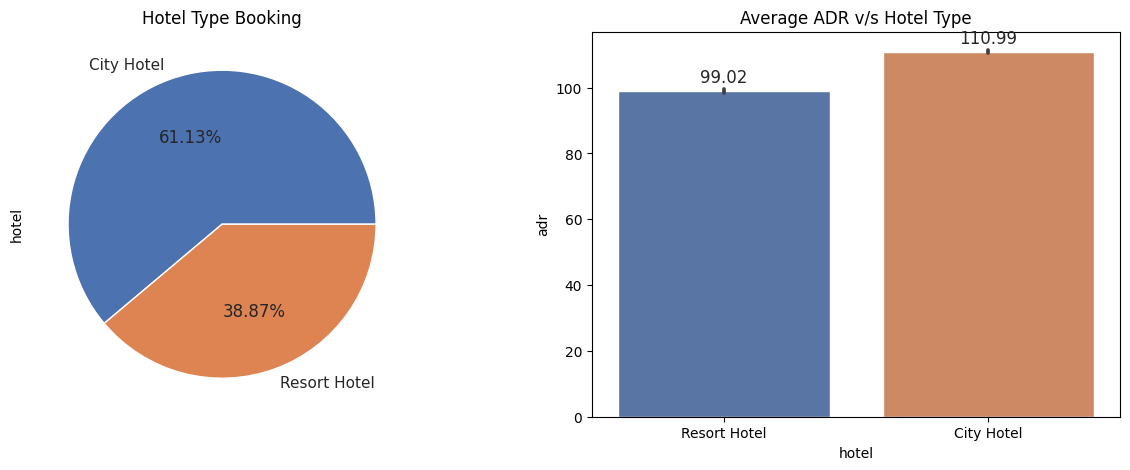

<Figure size 500x400 with 0 Axes>

In [22]:
figure, axes = plt.subplots(1, 2,figsize=(15, 5))
sns.set(style='whitegrid')
axes[0].set_title('Hotel Type Booking')
axes[1].set_title('Average ADR v/s Hotel Type')

h_type_count = df_hotel['hotel'].value_counts()       #plotting pie chart to determine the peference based on hotel type
plt.figure( figsize=(5, 4))
h_type_count.plot(kind = 'pie', y = 'Hotel Type', autopct = '%.02f%%', ax= axes[0])

ax = sns.barplot(x= 'hotel', y= 'adr', data= df_hotel, estimator= "mean", ax= axes[1])
ax.bar_label(ax.containers[0], fmt='%.2f', padding = 3)

In [23]:
df1 = df_hotel[['arrival_date', 'hotel']].reset_index()
df1['Year'] = df1['arrival_date'].dt.year
df1['Month'] = df1['arrival_date'].dt.month_name()
df1['Date'] = df1['arrival_date'].dt.date
df1['Day'] = df1['arrival_date'].dt.day_name()
print(df1)

        index arrival_date         hotel  Year   Month        Date        Day
0           0   2015-07-01  Resort Hotel  2015    July  2015-07-01  Wednesday
1           1   2015-07-01  Resort Hotel  2015    July  2015-07-01  Wednesday
2           2   2015-07-01  Resort Hotel  2015    July  2015-07-01  Wednesday
3           3   2015-07-01  Resort Hotel  2015    July  2015-07-01  Wednesday
4           4   2015-07-01  Resort Hotel  2015    July  2015-07-01  Wednesday
...       ...          ...           ...   ...     ...         ...        ...
87386  119385   2017-08-30    City Hotel  2017  August  2017-08-30  Wednesday
87387  119386   2017-08-31    City Hotel  2017  August  2017-08-31   Thursday
87388  119387   2017-08-31    City Hotel  2017  August  2017-08-31   Thursday
87389  119388   2017-08-31    City Hotel  2017  August  2017-08-31   Thursday
87390  119389   2017-08-29    City Hotel  2017  August  2017-08-29    Tuesday

[87391 rows x 7 columns]


In [24]:
x= df1.groupby(['Year', 'hotel']).size().reset_index(name= 'count')
y = df1.groupby(['hotel', 'Month']).size().reset_index(name= 'count')

sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
y.index=pd.CategoricalIndex(y['Month'],categories=sort_order,ordered=True)
y= y.sort_index().reset_index(drop=True)

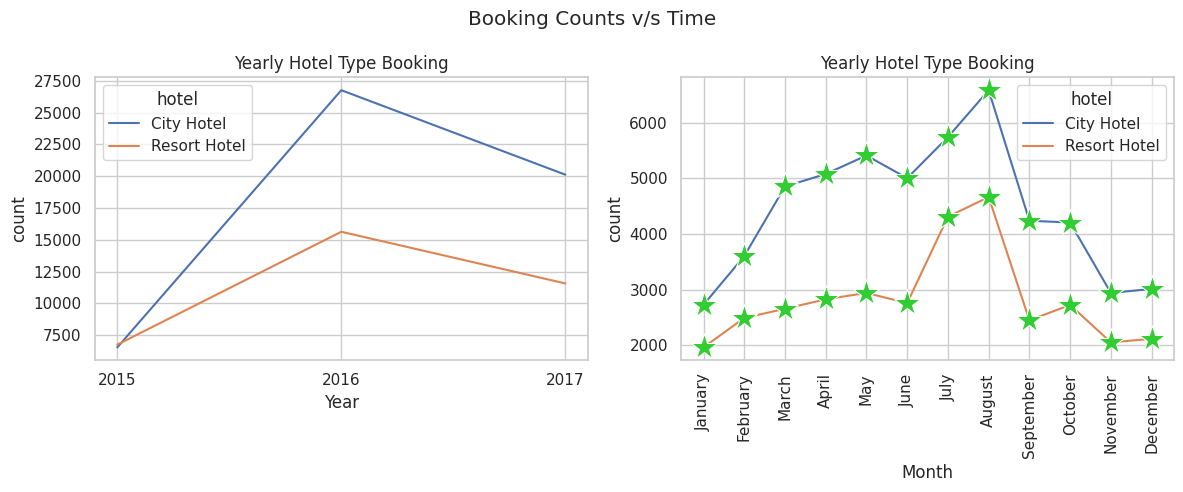

In [25]:
figure, axes = plt.subplots(1, 2,figsize=(12, 5))
figure.suptitle('Booking Counts v/s Time')
sns.set(style='whitegrid')
axes[0].set_title('Yearly Hotel Type Booking')
axes[1].set_title('Monthly Booking over the Years')

ax = sns.lineplot(x='Year', y='count', hue='hotel', data=x, ax =axes[0])
plt.title('Yearly Hotel Type Booking')
ax.set(xticks=[2015, 2016, 2017])

ax= sns.lineplot(data = y, x = 'Month', y = 'count', hue = 'hotel', ax= axes[1], marker='*', markerfacecolor='limegreen', markersize=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<Axes: xlabel='Day', ylabel='count'>

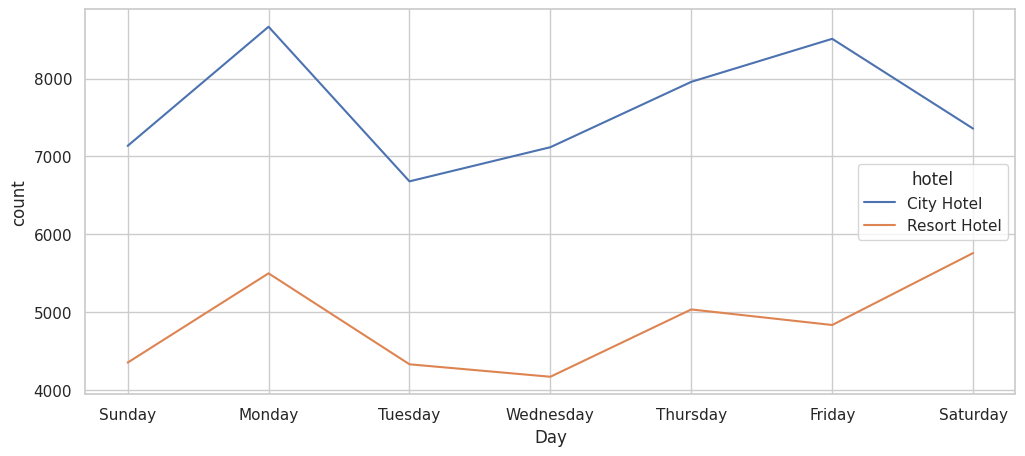

In [26]:
df_day= df1.groupby(['hotel', 'Day'])['Day'].count().reset_index(name= 'count').sort_values('Day')
sorted_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df_day.index= pd.CategoricalIndex(df_day['Day'],categories=sorted_order,ordered=True)
df_day= df_day.sort_index().reset_index(drop=True)
figure, axes = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(data= df_day, x= 'Day', y= 'count', hue= 'hotel')

In [27]:
df_ms = df_hotel[['market_segment', 'hotel']].groupby(['market_segment','hotel'])['hotel'].count().reset_index(name='counts')
df_dc = df_hotel[['distribution_channel', 'hotel']].groupby(['distribution_channel', 'hotel'])['hotel'].count().reset_index(name='counts')

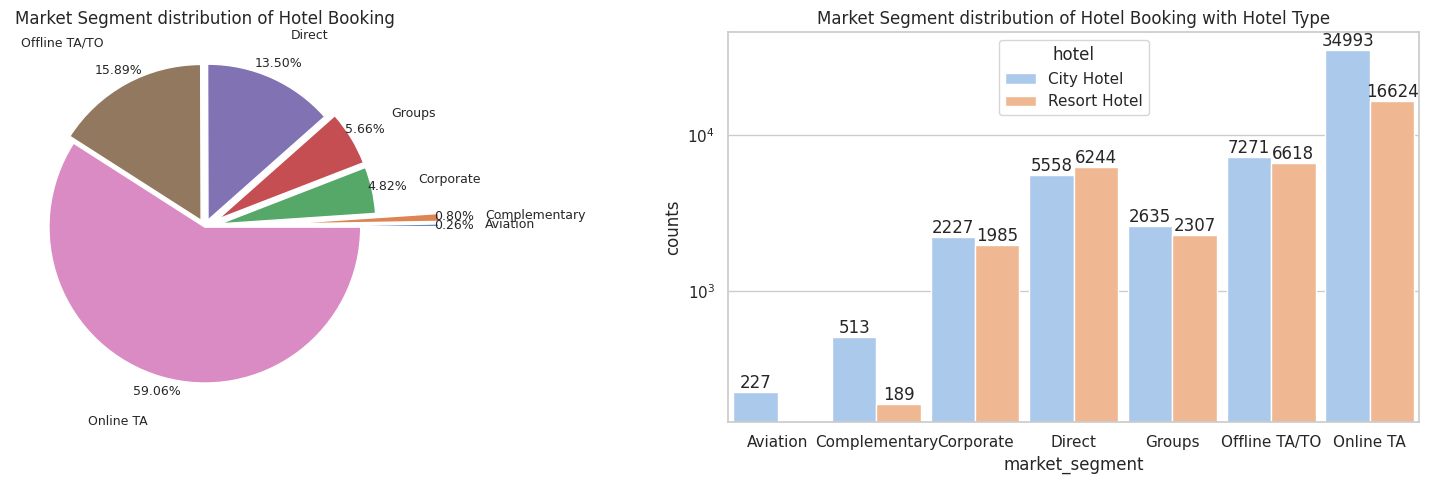

In [28]:
figure, axes = plt.subplots(1, 2, figsize=(16, 5))
axes[0].set_title('Market Segment distribution of Hotel Booking')
axes[1].set_title('Market Segment distribution of Hotel Booking with Hotel Type')
ax = sns.barplot(x='market_segment', y='counts', hue='hotel', data=df_ms, palette='pastel', ax=axes[1], width= .9)
ax.set_yscale("log")
for i in ax.containers:
    ax.bar_label(i,)
df_hotel[['market_segment', 'hotel']].groupby(['market_segment']).count().sort_values(['hotel'],ascending =True)\
      .plot(kind = 'pie', y='hotel', autopct= '%.02f%%', legend= False, label="",\
            explode= [0.5,0.5,0.1,0.1,0.05,0.05,0], fontsize=9, pctdistance=1.1, labeldistance=1.3, ax=axes[0])
figure.tight_layout()
plt.show()

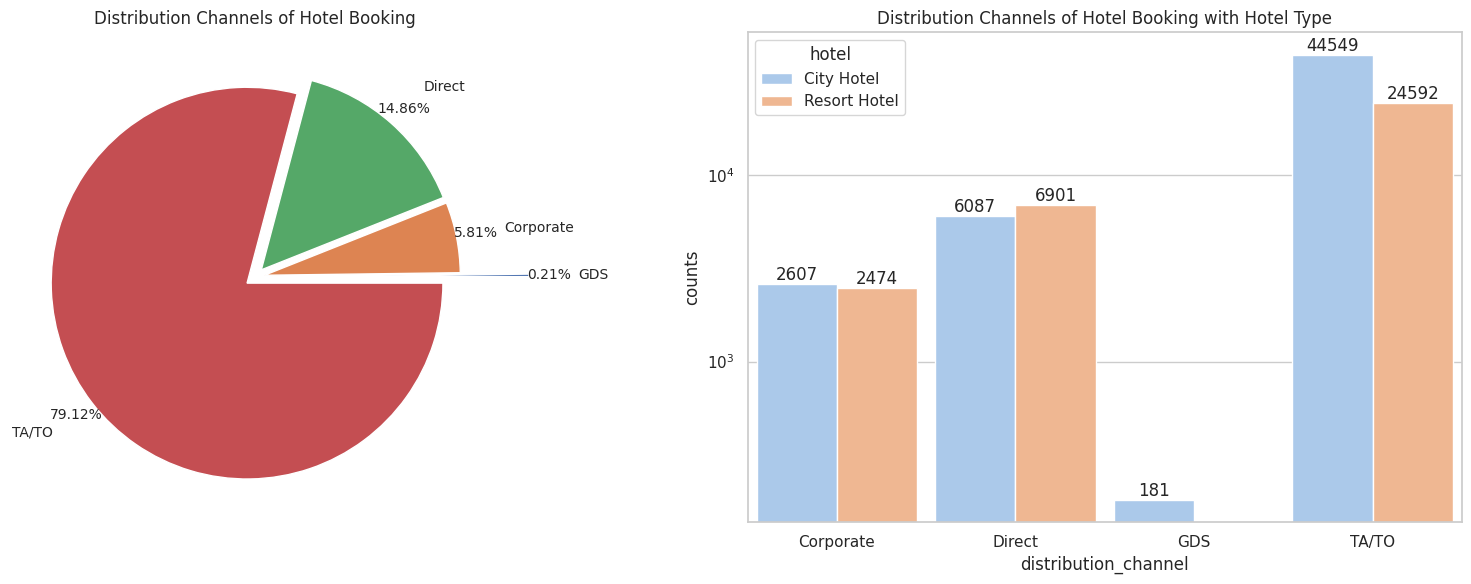

In [29]:
figure, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].set_title('Distribution Channels of Hotel Booking')
axes[1].set_title('Distribution Channels of Hotel Booking with Hotel Type')
ax= sns.barplot(x='distribution_channel', y='counts', hue='hotel', data=df_dc, palette='pastel', ax=axes[1], width= .9)
ax.set_yscale("log")
for i in ax.containers:
    ax.bar_label(i,)
df_hotel[['distribution_channel', 'hotel']].groupby(['distribution_channel']).count().sort_values(['hotel'],ascending =True)\
      .plot(kind = 'pie', y='hotel', autopct= '%.02f%%', legend= False, label="",\
             fontsize=10, explode= [0.4,0.05,0.05,0.05], pctdistance=1.1, labeldistance=1.25, ax=axes[0])
figure.tight_layout()
plt.show()

In [30]:
df_agent= df_hotel[['agent', 'adr']]
df_agent = df_agent.astype({'agent': int})

df_agent= df_agent[df_agent['agent'] != 0].groupby(['agent'])['adr'].agg(['sum','count','mean']).sort_values(['sum'],ascending= False)[0:6].reset_index()
print(df_agent)

   agent         sum  count        mean
0      9  3552820.44  28758  123.541986
1    240  1530978.31  13028  117.514454
2     14   426342.36   3348  127.342401
3    250   371628.11   2779  133.727280
4      7   318975.70   3300   96.659303
5    241   167450.32   1644  101.855426


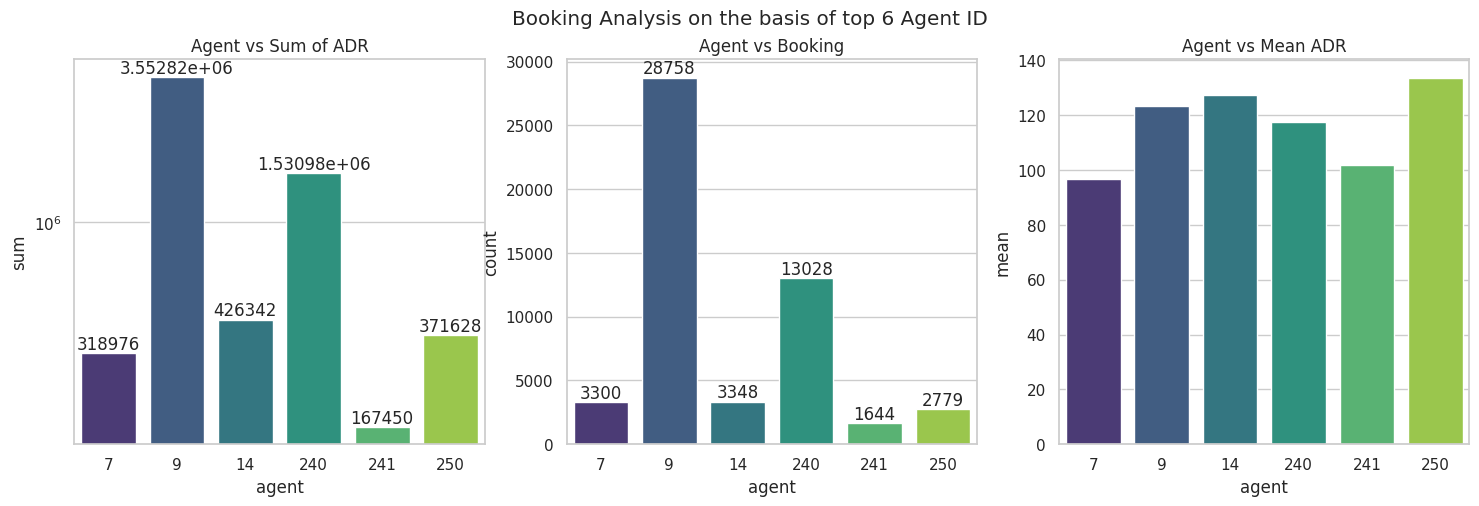

In [31]:
figure, axes = plt.subplots(1, 3, figsize=(18, 5))
figure.suptitle('Booking Analysis on the basis of top 6 Agent ID')
axes[0].set_title('Agent vs Sum of ADR')
axes[1].set_title('Agent vs Booking')
axes[2].set_title('Agent vs Mean ADR')
ax= sns.barplot(x ='agent', y= 'sum', data= df_agent, palette ='viridis', ax = axes[0])
ax.set_yscale("log")
for i in ax.containers:
    ax.bar_label(i,)
ax= sns.barplot(x ='agent', y= 'count', data= df_agent, palette ='viridis', ax = axes[1])
for i in ax.containers:
    ax.bar_label(i,)
sns.barplot(x ='agent', y= 'mean', data= df_agent, palette ='viridis', ax = axes[2])
plt.show()

In [32]:
famly = df_hotel.loc[:,['hotel','adults','children','babies']]
conditions = [
    ((famly['babies'] > 0) | (famly['children'] > 0) & (famly['adults'] > 0)),
    ((famly['babies'] == 0) & (famly['children'] == 0) & (famly['adults'] == 2)),
    ((famly['babies'] == 0) & (famly['children'] == 0) |(famly['adults'] == 0) )
]
results = ['Family', 'Couple','Not Family']
famly['guest_type'] = np.select(conditions, results)

(0.0, 40000.0)

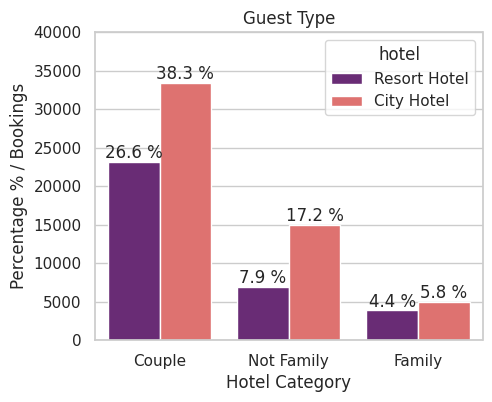

In [33]:
from collections import Counter
famy = famly.groupby(['hotel','guest_type'],as_index= False).count().sort_values(['hotel','adults'],ascending= False)
plt.figure(figsize = (5,4))
ax=sns.barplot(x = 'guest_type', y= 'adults', hue = 'hotel', data = famy, palette = 'magma')
for i in ax.containers:
  ax.bar_label(i, fmt=lambda x: '{:.1f} %'.format(x /872.25))
plt.title('Guest Type')
plt.xlabel('Hotel Category')
plt.ylabel('Percentage % / Bookings')
plt.ylim(0,40000)

In [34]:
df_canceled = df_hotel.loc[:,['is_canceled', 'deposit_type']]

df_canceled['is_canceled']= np.where(df_canceled["is_canceled"] == 1, 'Canceled', 'Not Canceled')

df_c1 = df_canceled.groupby('is_canceled')['deposit_type'].agg(['count']).reset_index()
print(df_c1)

    is_canceled  count
0      Canceled  24021
1  Not Canceled  63370


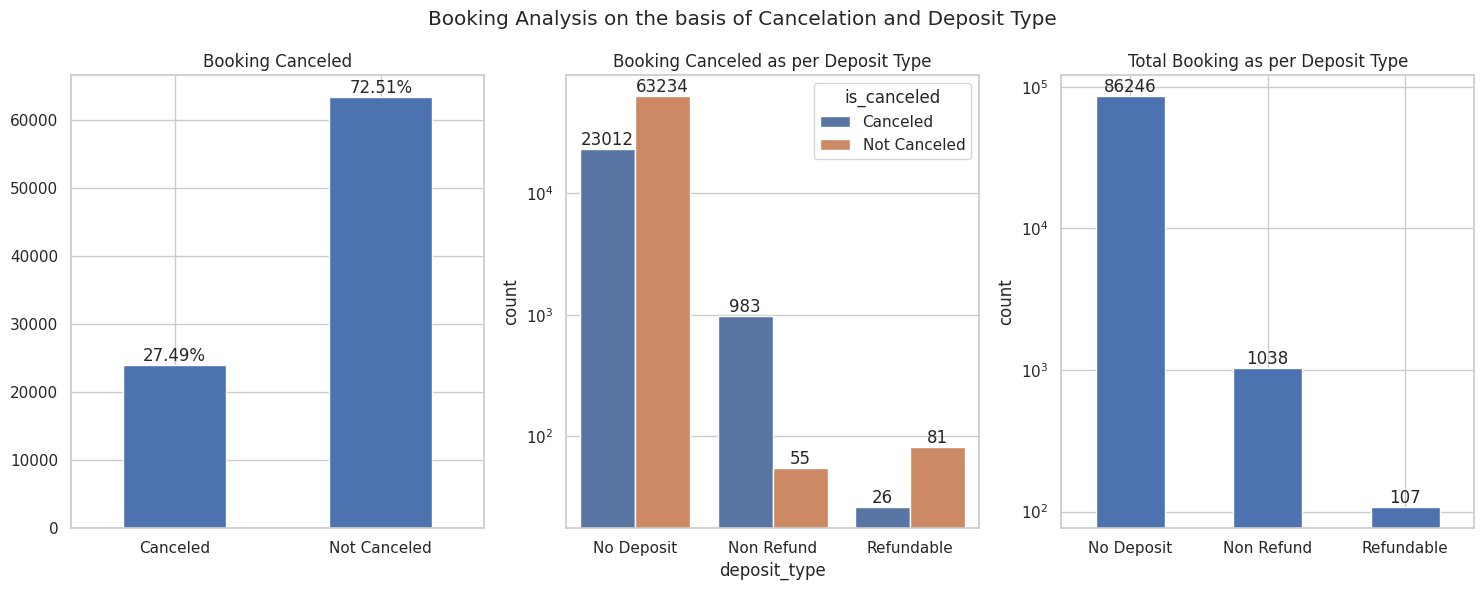

In [35]:
figure, axes = plt.subplots(1, 3, figsize=(15, 6))
figure.suptitle('Booking Analysis on the basis of Cancelation and Deposit Type')
axes[0].set_title('Booking Canceled')
axes[1].set_title('Booking Canceled as per Deposit Type')
axes[2].set_title('Total Booking as per Deposit Type')

ax =sns.barplot(data= df_canceled.groupby(['deposit_type', 'is_canceled'])['is_canceled'].agg(['count']).reset_index(),\
            x = 'deposit_type', y= 'count', hue = 'is_canceled', ax= axes[1])
ax.set(yscale="log")
for i in ax.containers:
  ax.bar_label(i, )

ax= df_c1.plot(kind= 'bar', y= 'count', x= 'is_canceled', xlabel='', legend=False, ax= axes[0], rot=(0))
for i in ax.containers:
  ax.bar_label(i, fmt= lambda x: '{:.2f}%'.format(x*100/sum(df_c1['count'])))

ax= df_canceled[['deposit_type']].groupby('deposit_type').value_counts().reset_index(name = 'count')\
.plot(kind='bar', y= 'count', x= 'deposit_type', logy= True, ylabel='count', xlabel='', rot= (0), legend= False, ax= axes[2])
for i in ax.containers:
  ax.bar_label(i, )

figure.tight_layout()
plt.show()

In [36]:
df_tns= df_hotel.loc[:,['adr','total_night_stay']]
df_tns.drop(df_tns[df_tns['adr'] > 1000].index, inplace = True)

df_lt= df_hotel.loc[:,['lead_time','total_night_stay']]
df_lt.drop(df_lt[(df_lt['lead_time'] > 600) | (df_lt['total_night_stay'] >50)].index, inplace = True)

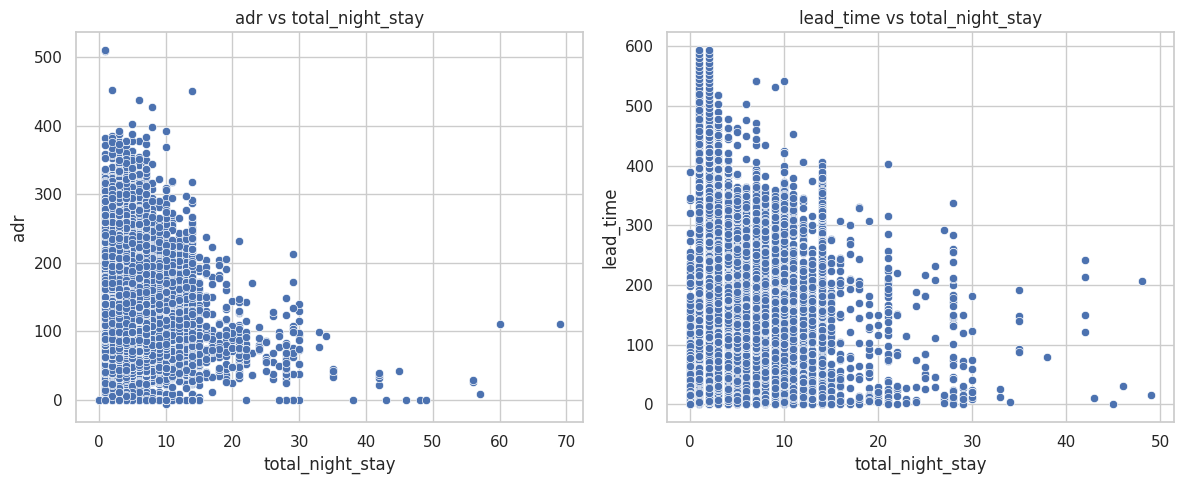

In [37]:
figure, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].set_title('adr vs total_night_stay')
axes[1].set_title('lead_time vs total_night_stay')

sns.scatterplot(y = 'adr', x = 'total_night_stay', data = df_tns, ax= axes[0])
sns.scatterplot(y = 'lead_time', x = 'total_night_stay', data = df_lt, ax= axes[1])
figure.tight_layout()

In [38]:
df_countries = df_hotel[['country', 'hotel']].groupby('country')['hotel'].agg(['count']).reset_index().sort_values(by= ['count'], ascending=False)
df_countries = df_countries.drop(df_countries[df_countries['country'] == 'others'].index)
df_countries = df_countries.drop(df_countries[df_countries['count'] < 100].index)

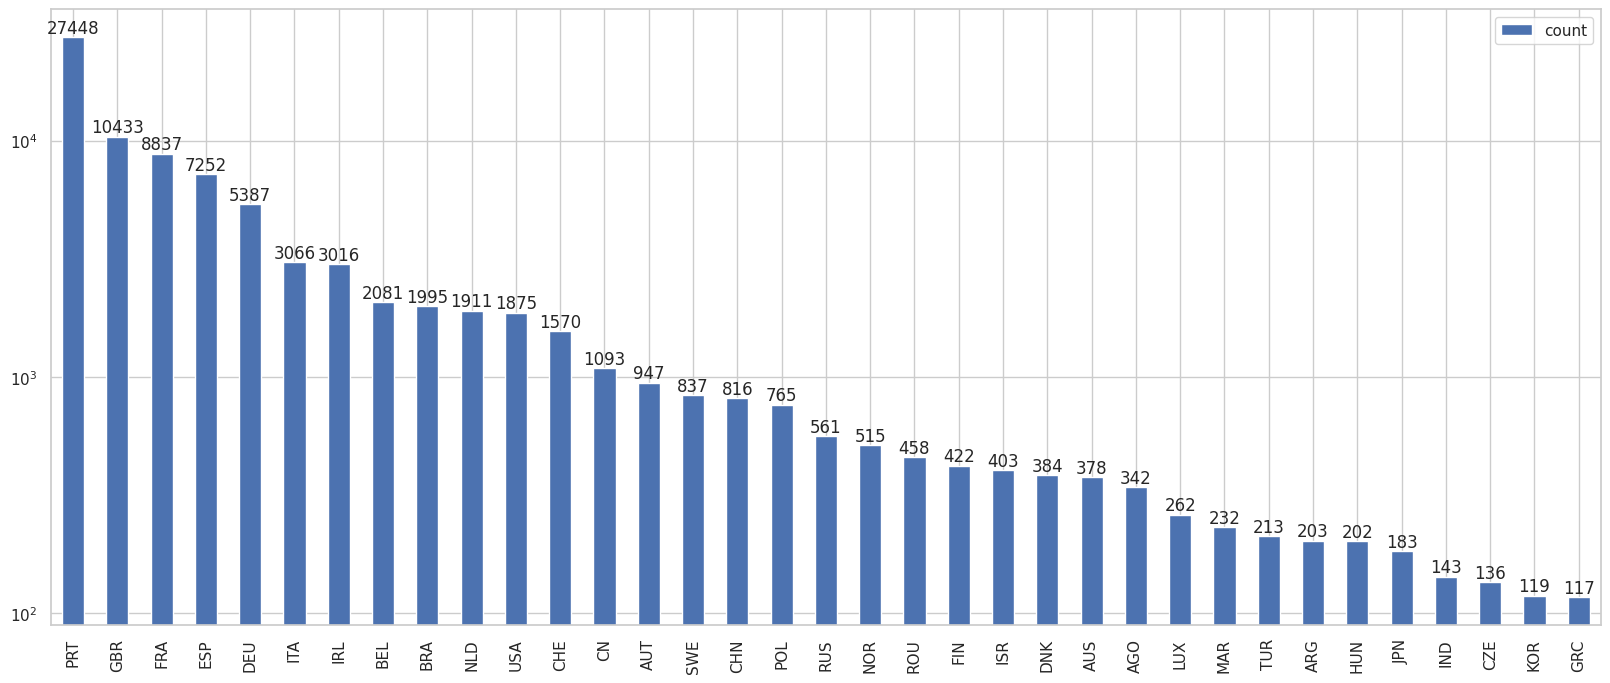

In [39]:
ax = df_countries.plot.bar(x='country', xlabel = '', figsize=(20,8), logy= True)
for i in ax.containers:
  ax.bar_label(i, )

In [ ]:
import geopandas as gpd

df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_world
df_countries

In [ ]:
df_countries_h = df_world.merge(df_countries, how="inner", left_on=['iso_a3'], right_on=['country'])
print("Type of DataFrame : ", type(df_countries_h), df_countries_h.shape[0])
df_countries_h

<Axes: >

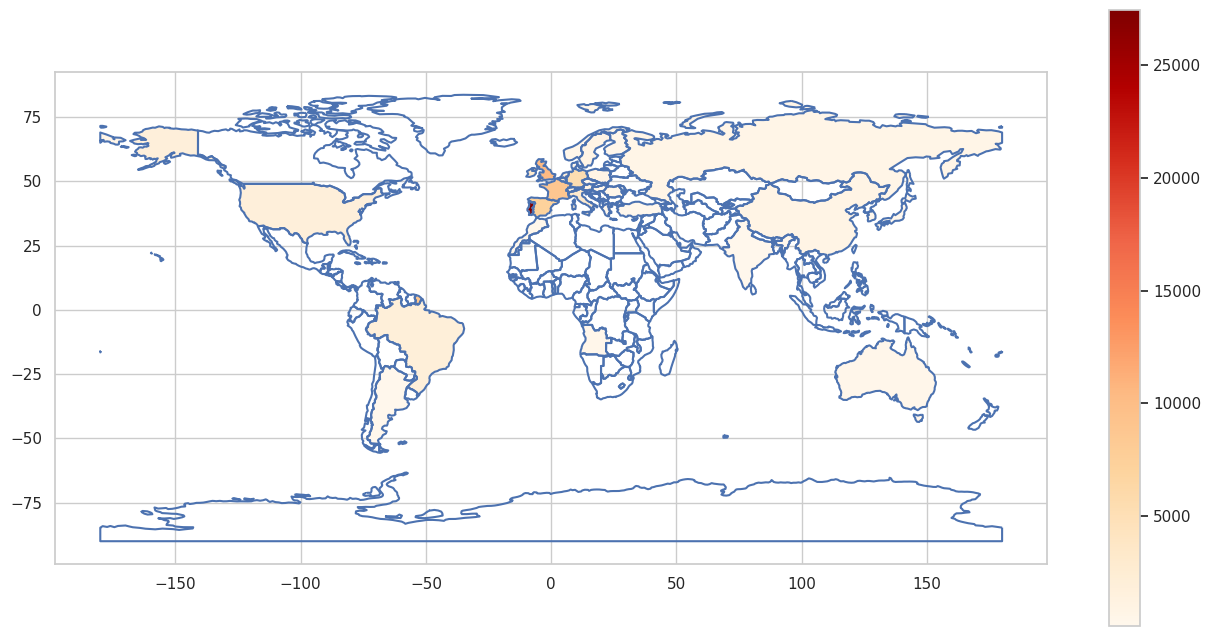

In [42]:
ax = df_world["geometry"].boundary.plot(figsize=(16,8))
df_countries_h.plot(column="count", ax=ax, cmap='OrRd',legend=True)

In [43]:
df_countries_EU = df_countries_h.drop(df_countries_h[df_countries_h['country'] == 'RUS'].index, inplace= True)
df_countries_EU = df_countries_h.drop(df_countries_h[df_countries_h['continent'] != 'Europe'].index)
print(df_countries_EU)
print(df_countries_h[df_countries_h['country'] == 'RUS'])

       pop_est continent            name iso_a3  gdp_md_est  \
3    5347896.0    Europe          Norway    NOR      403336   
5   67059887.0    Europe          France    FRA     2715518   
10  10285453.0    Europe          Sweden    SWE      530883   
11  37970874.0    Europe          Poland    POL      595858   
12   8877067.0    Europe         Austria    AUT      445075   
13   9769949.0    Europe         Hungary    HUN      163469   
14  19356544.0    Europe         Romania    ROU      250077   
15  83132799.0    Europe         Germany    DEU     3861123   
16  10716322.0    Europe          Greece    GRC      209852   
18   8574832.0    Europe     Switzerland    CHE      703082   
19    619896.0    Europe      Luxembourg    LUX       71104   
20  11484055.0    Europe         Belgium    BEL      533097   
21  17332850.0    Europe     Netherlands    NLD      907050   
22  10269417.0    Europe        Portugal    PRT      238785   
23  47076781.0    Europe           Spain    ESP     139

Text(0.5, 1.0, 'Hotel Booking in Europe')

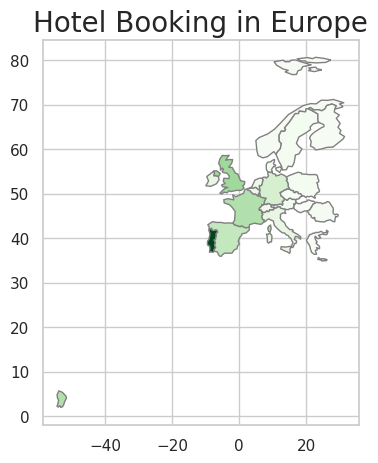

In [44]:
fig, ax = plt.subplots(1, figsize=(10, 5))
df_countries_EU.plot(column='count', ax=ax, edgecolor='.5', linewidth=1, cmap='Greens')
ax.set_title('Hotel Booking in Europe', fontdict={'fontsize': '20', 'fontweight' : '3'})

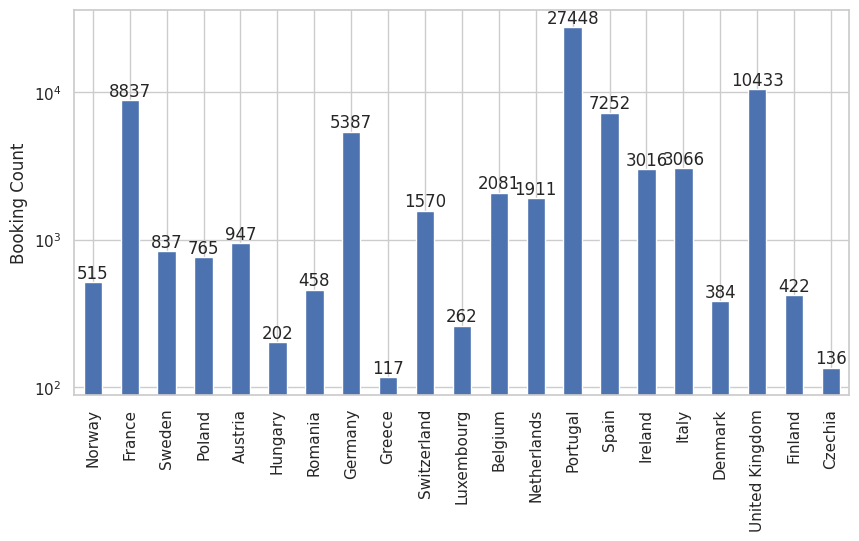

In [45]:
ax= df_countries_EU.plot.bar(x= 'name', y= 'count', figsize= (10,5), logy= True, legend= False, xlabel= '', ylabel= 'Booking Count')
for i in ax.containers:
  ax.bar_label(i, )

In [46]:
df_c_adr = df_hotel[['country', 'adr']].groupby('country')['adr'].agg(['sum']).reset_index().sort_values(by= ['sum'], ascending=False)
lst_country = df_c_adr.loc[df_c_adr['sum'] > 100000,'country']

df_c_r= df_hotel[['country', 'adr']]
df_c_r.sort_values(by= ['adr'], ascending= False)
df_c_r = df_c_r.drop(df_c_r[df_c_r['adr'] > 600 ].index)

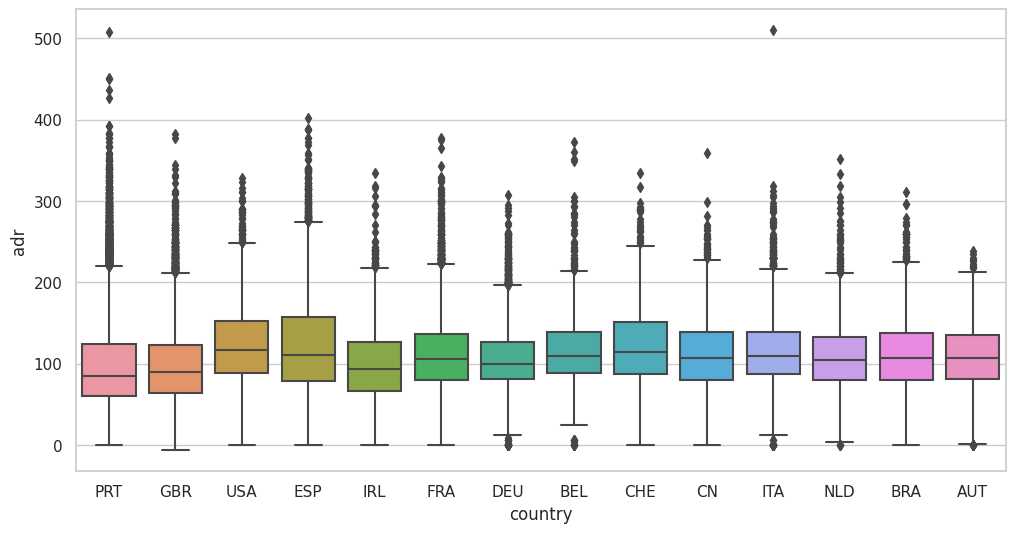

In [47]:
plt.figure(figsize = (12,6))
sns.boxplot(x= 'country', y='adr', data= df_c_r[df_c_r['country'].isin(list(lst_country))])
plt.show()

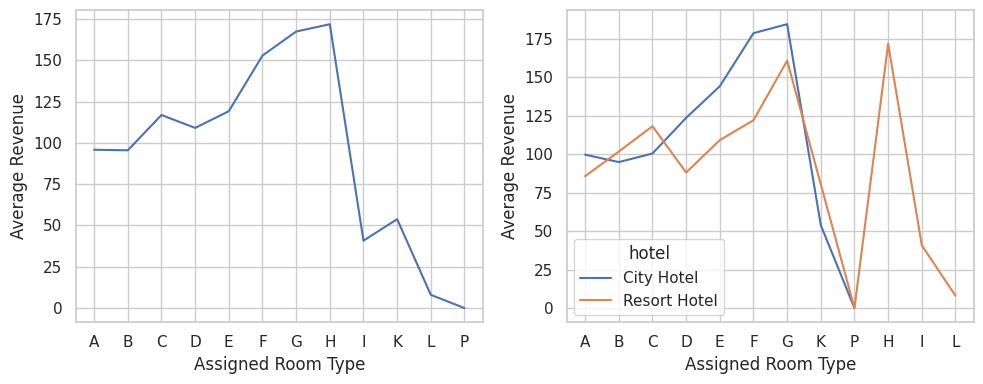

In [48]:
room_type = df_hotel[['hotel','assigned_room_type','reserved_room_type','adr']].groupby(['assigned_room_type'],as_index =False)['adr'].mean()
hote_room_ty = df_hotel[['hotel','assigned_room_type','reserved_room_type','adr']].groupby(['hotel','assigned_room_type'],as_index =False)['adr'].mean()
fig, axes = plt.subplots(1, 2, figsize=(10,4))
for i in range(2):
  axes[i].set_xlabel('Assigned Room Type')
  axes[i].set_ylabel('Average Revenue')
sns.lineplot(ax=axes[0],x= 'assigned_room_type',y='adr', data=room_type,errorbar=None)
sns.lineplot(ax=axes[1],x= 'assigned_room_type',y='adr',hue='hotel', data=hote_room_ty, errorbar=None)
fig.tight_layout()

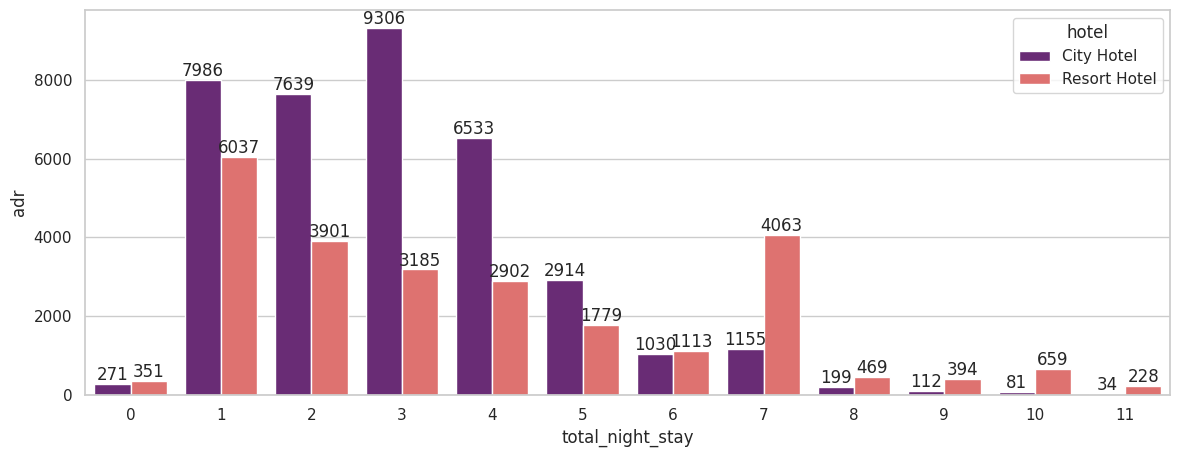

In [49]:
total_stay = df_hotel[(df_hotel['is_canceled'] == 0) & (df_hotel['total_night_stay']  <12)].groupby(['hotel','total_night_stay'],as_index = False)['adr'].count()
plt.figure(figsize = (14,5))
ax=sns.barplot(x = 'total_night_stay', y= 'adr', hue = 'hotel', data = total_stay, palette = 'magma')
for i in ax.containers:
  ax.bar_label(i, fmt=lambda x: '{:.0f}'.format(x))
plt.show()

In [50]:
res_assig =df_hotel.loc[:,['hotel','assigned_room_type','reserved_room_type','is_canceled','adr']]
res_assig['res & assi']=res_assig.apply(lambda x: 'Assigned' if x['assigned_room_type'] == x['reserved_room_type'] else 'Not Assigned',axis =1)
res_assign = res_assig[['hotel','res & assi']].groupby(['hotel'])['res & assi'].value_counts(normalize = False).unstack()
res_assignd = res_assign.copy()
res_assignd['Assigned'] = res_assign['Assigned']*100/(res_assign['Assigned'] + res_assign['Not Assigned'])
res_assignd['Not Assigned'] = res_assign['Not Assigned']*100/(res_assign['Assigned'] + res_assign['Not Assigned'])

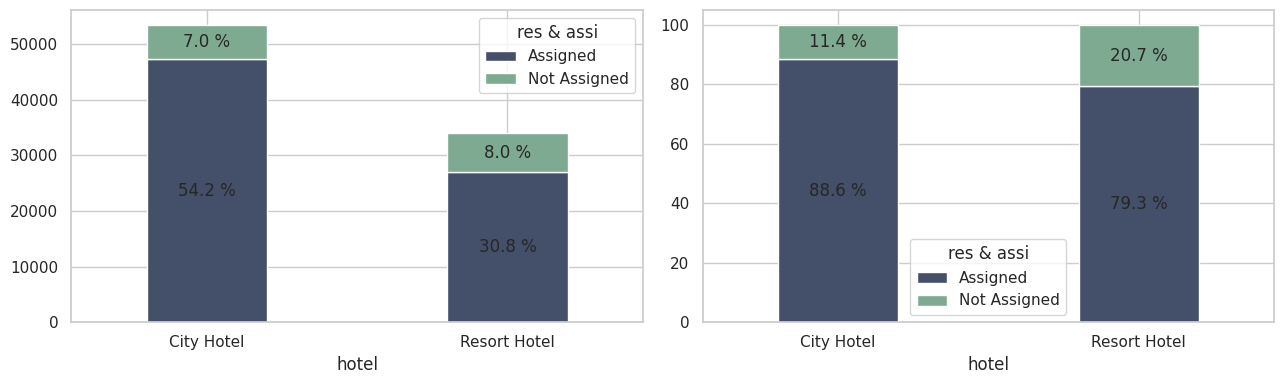

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(13,4))
ax = res_assign.plot(kind='bar', stacked=True, color=['#445069','#7EAA92'],ax=axes[0],width = 0.4,rot = 0)
for c in ax.containers:
    ax.bar_label(c,fmt=lambda x: '{:.1f} %'.format(x*100/len(res_assig['res & assi'])),label_type='center')

ay = res_assignd.plot(kind='bar', stacked=True, color=['#445069','#7EAA92'],ax=axes[1],width = 0.4,rot=0)
for c in ay.containers:
  ay.bar_label(c,fmt=lambda x: '{:.1f} %'.format(x),label_type='center')
fig.tight_layout()